In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**5.2 Знакомство с Matplotlib**

In [5]:
df = pd.read_csv("wage-data.csv")

In [37]:
df.head()

,Year,State,Salary
0,1968,Alabama,0.00000
1,1968,Alaska,2.10000
2,1968,Arizona,0.66000
3,1968,Arkansas,0.15625
4,1968,California,1.65000


In [38]:
series = (df[df['State'] == 'California'].set_index('Year')['Salary'])

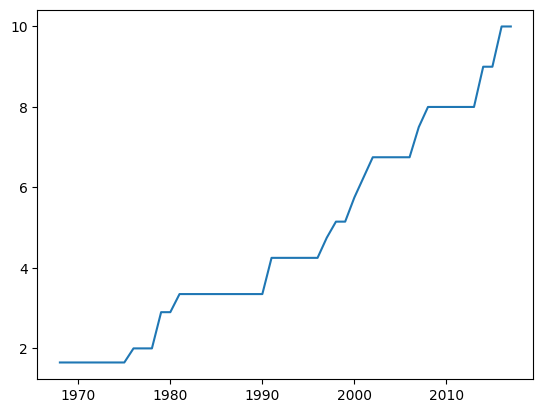

In [39]:
plt.plot(series)

**[+]**<br>
Урок 2. Знакомство с matplotlib.pyplot<br>
Практика<br>
Задание 1<br>
Загрузите файл wage_data.csv в DataFrame. Постройте линейный график изменения минимальной зарплаты (признак Salary), усредненной по всем штатам<br>

In [40]:
series_mean_salary = df.groupby("Year")["Salary"].mean()

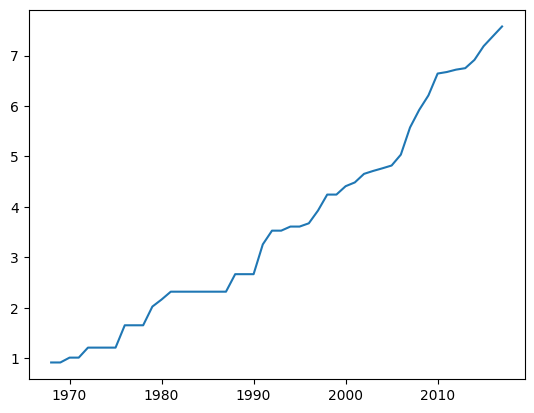

In [43]:
plt.plot(series_mean_salary)


**5.3 Детали графика (подписи, заголовки, легенды и прочее)**

Text(0, 0.5, 'Минимальная зарплата $/час')

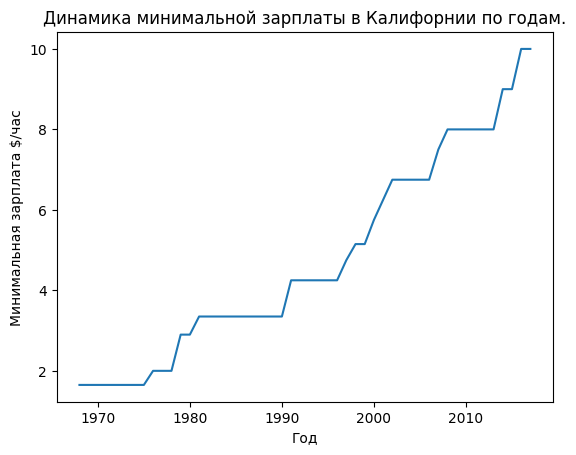

In [61]:
series1 = (df[df['State'] == 'California'].set_index('Year')['Salary'])
plt.plot(series1)
plt.title('Динамика минимальной зарплаты в Калифорнии по годам.')
plt.xlabel('Год')
plt.ylabel('Минимальная зарплата $/час')

In [62]:
print(series1.index.min())
print(series1.index.max())

1968
2017


In [63]:
x_range = list(range(series1.index.min(), series1.index.max() + 1, 10))
x_range

[1968, 1978, 1988, 1998, 2008]

In [64]:
x_range.append(series1.index.max()) 
x_range

[1968, 1978, 1988, 1998, 2008, 2017]

([<matplotlib.axis.XTick at 0x139b22cce20>,
 [Text(1968, 0, '1968'),
  Text(1978, 0, '1978'),
  Text(1988, 0, '1988'),
  Text(1998, 0, '1998'),
  Text(2008, 0, '2008'),
  Text(2017, 0, '2017')])

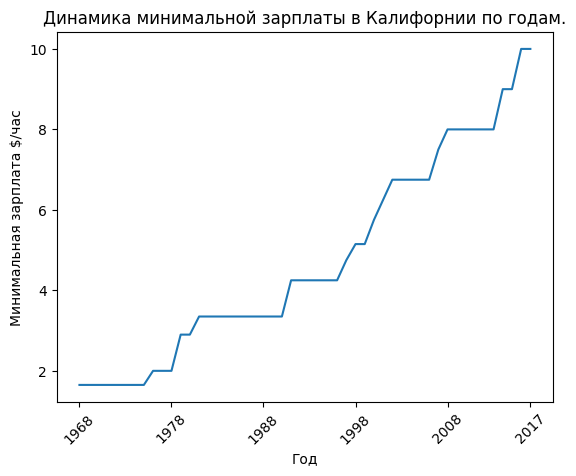

In [68]:
plt.plot(series1)
plt.title('Динамика минимальной зарплаты в Калифорнии по годам.')
plt.xlabel('Год')
plt.ylabel('Минимальная зарплата $/час')
plt.xticks(x_range, rotation = 45)

**5.4 Виды данных, визуализация численных данных**

Категориальные данные - Это названия. Штат и т.д.<br>
Численные данные - данные, с которыми можно проводить арефмитические операции

In [7]:
series_min_salary = df[df['Year'] == 2010]['Salary']
print("Максимальное значение =", series_min_salary.max())
print("Минимальное значение =", series_min_salary.min())

Максимальное значение = 8.55
Минимальное значение = 0.0


Text(0, 0.5, '# записей')

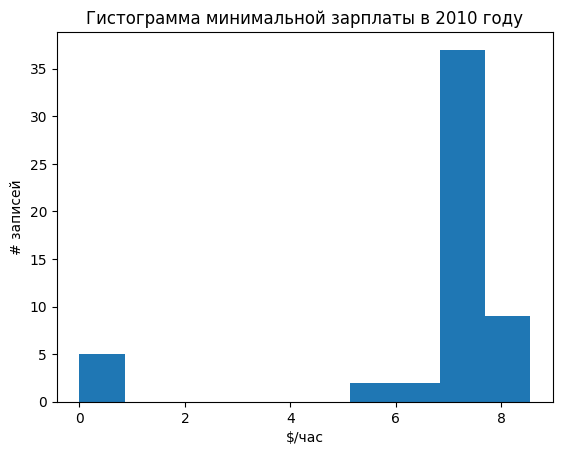

In [8]:
plt.hist(series_min_salary, bins=10)

plt.title('Гистограмма минимальной зарплаты в 2010 году')
plt.xlabel('$/час')
plt.ylabel('# записей')

([<matplotlib.axis.XTick at 0x2193c6a1b10>,
 [Text(0.0, 0, '0.000'),
  Text(0.8550000000000001, 0, '0.855'),
  Text(1.7100000000000002, 0, '1.710'),
  Text(2.5650000000000004, 0, '2.565'),
  Text(3.4200000000000004, 0, '3.420'),
  Text(4.275, 0, '4.275'),
  Text(5.130000000000001, 0, '5.130'),
  Text(5.985, 0, '5.985'),
  Text(6.840000000000001, 0, '6.840'),
  Text(7.695000000000001, 0, '7.695'),
  Text(8.55, 0, '8.550')])

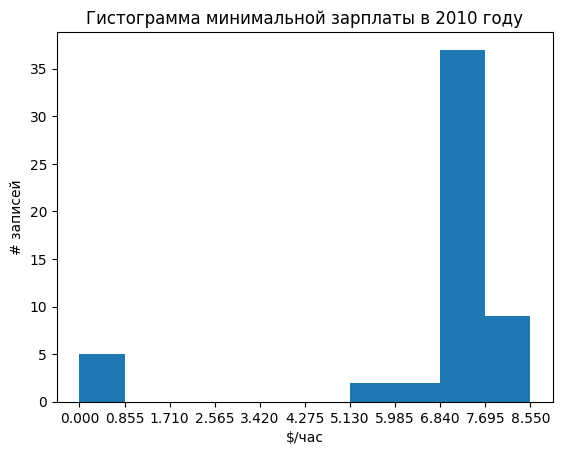

In [9]:
bin_width = series_min_salary.max() / 10

x_range = [i * bin_width for i in range(11)]

plt.hist(series_min_salary, bins=10)

plt.title('Гистограмма минимальной зарплаты в 2010 году')
plt.xlabel('$/час')
plt.ylabel('# записей')
plt.xticks(x_range)

Text(0, 0.5, '$/час')

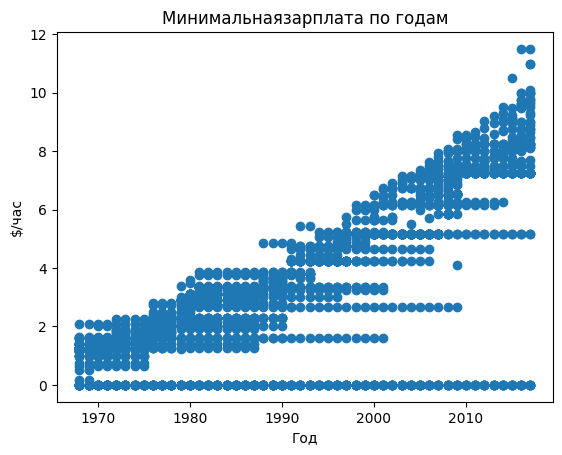

In [10]:
plt.scatter(df["Year"], df["Salary"])
plt.title("Минимальнаязарплата по годам")
plt.xlabel('Год')
plt.ylabel('$/час')

In [13]:
dff = pd.read_csv("wage-data-coast.csv")
dff

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


Text(0, 0.5, '$/час')

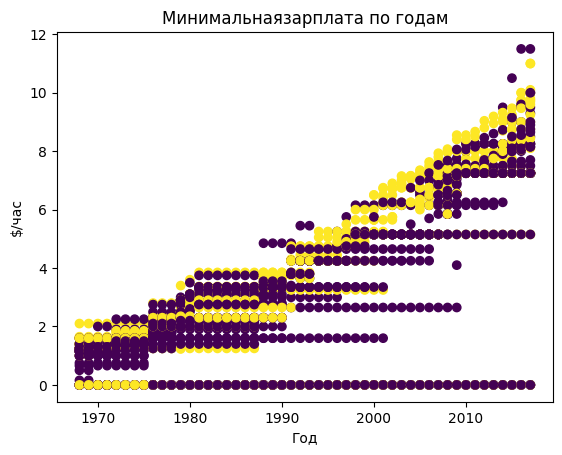

In [18]:
plt.scatter(dff["Year"], dff["Salary"], c=dff["IsCoastal"])
plt.title("Минимальнаязарплата по годам")
plt.xlabel('Год')
plt.ylabel('$/час') 

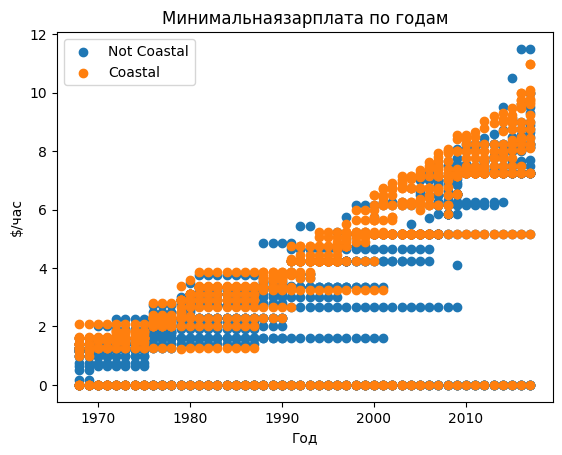

In [21]:
dff0 = dff[dff['IsCoastal'] == 0]
plt.scatter(dff0['Year'], dff0['Salary'], label = 'Not Coastal')

dff1 = dff[dff['IsCoastal']==1]
plt.scatter(dff1['Year'], dff1['Salary'], label='Coastal')

plt.title("Минимальная зарплата по годам")
plt.xlabel('Год')
plt.ylabel('$/час') 

plt.legend()

In [22]:
dff[df['Year']==2017].sort_values("Salary", ascending=False).head(2)

,Year,State,Salary,IsCoastal
2703,2017,District of Columbia,11.5,0
2746,2017,Washington,11.0,1


**Практика<br>
Задание 1<br>**
Используя обновленный датасет wage-data-coast.csv, постройте гистограмму распределения минимальной зарплаты в прибрежных штатах в 2000 году. При построении графика переопределите горизонтальную ось так, чтобы отметки на оси совпадали со столбцами гистограммы.

([<matplotlib.axis.XTick at 0x2194a4219f0>,
 [Text(0.0, 0, '0.00'),
  Text(0.65, 0, '0.65'),
  Text(1.3, 0, '1.30'),
  Text(1.9500000000000002, 0, '1.95'),
  Text(2.6, 0, '2.60'),
  Text(3.25, 0, '3.25'),
  Text(3.9000000000000004, 0, '3.90'),
  Text(4.55, 0, '4.55'),
  Text(5.2, 0, '5.20'),
  Text(5.8500000000000005, 0, '5.85'),
  Text(6.5, 0, '6.50')])

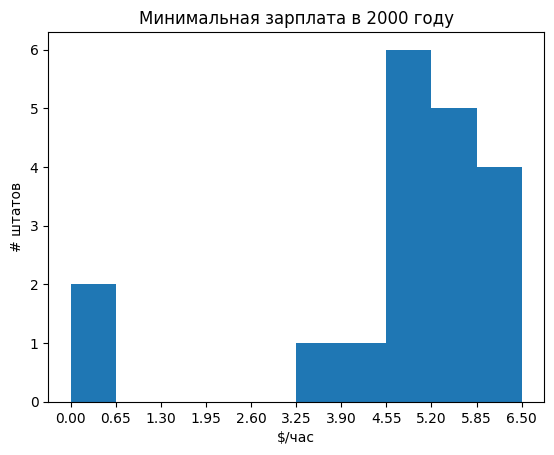

In [24]:
df_coast_min_salary = dff[(dff["Year"]==2000) & (dff["IsCoastal"] == 1)]['Salary']

plt.hist(df_coast_min_salary)
plt.title("Минимальная зарплата в 2000 году")
plt.xlabel('$/час')
plt.ylabel('# штатов') 

bin_width_coast_min_salary = df_coast_min_salary.max() / 10
x_range_coast_min_salary = [i * bin_width_coast_min_salary for i in range(11)]
          
plt.xticks(x_range_coast_min_salary)

**5.5 Визуализация категориальных данных**

In [30]:
dff_barchart = dff[dff['Year'] == 2015].groupby('IsCoastal')['Salary'].mean()
dff_barchart

IsCoastal
0    6.882778
1    7.760526
Name: Salary, dtype: float64

In [31]:
dff_barchart = dff_barchart.sort_values(ascending=False).reset_index()
dff_barchart

,IsCoastal,Salary
0,1,7.760526
1,0,6.882778


In [34]:
dff_barchart['IsCoastal'] == np.where(dff_barchart['IsCoastal'] == 1, 'Coastal', 'Not Coastal')
dff_barchart

,IsCoastal,Salary
0,1,7.760526
1,0,6.882778


Text(0, 0.5, '$/час')

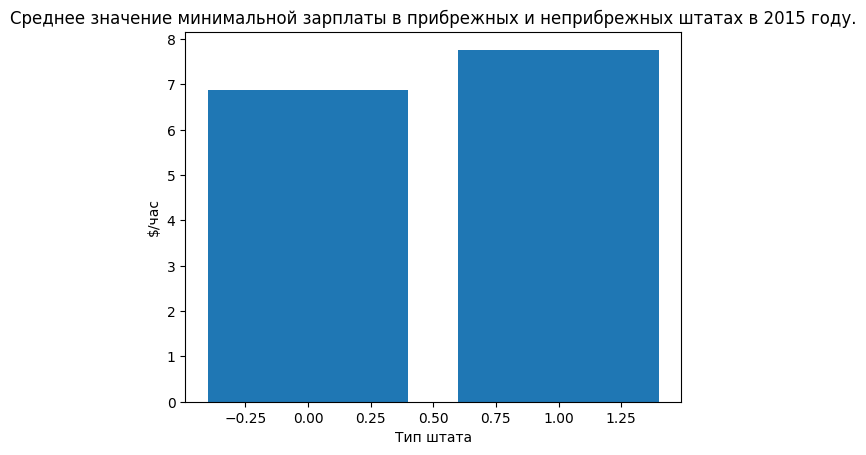

In [35]:
plt.bar(dff_barchart['IsCoastal'], dff_barchart['Salary'])
plt.title("Среднее значение минимальной зарплаты в прибрежных и неприбрежных штатах в 2015 году.")
plt.xlabel('Тип штата')
plt.ylabel('$/час') 

Text(0, 0.5, '# штата')

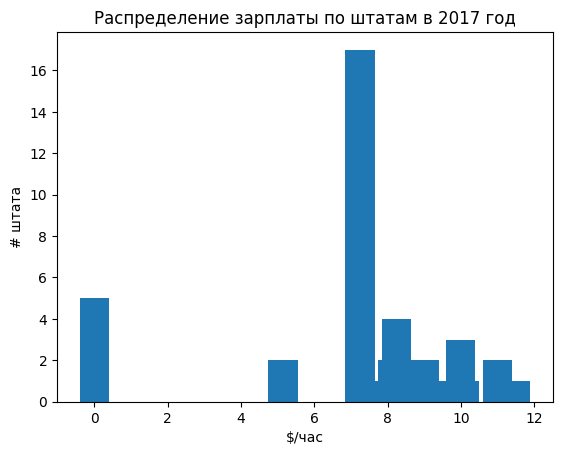

In [44]:
dff_barchart2 = dff[dff["Year"] == 2017].groupby("Salary")["State"].count().reset_index().sort_values("Salary")
plt.bar(dff_barchart2['Salary'], dff_barchart2['State'])

plt.title("Распределение зарплаты по штатам в 2017 год")
plt.xlabel('$/час')
plt.ylabel('# штата')

(array([ 5.,  0.,  0.,  0.,  2.,  0., 19., 15., 11.,  3.]),
 array([ 0.  ,  1.15,  2.3 ,  3.45,  4.6 ,  5.75,  6.9 ,  8.05,  9.2 ,
        10.35, 11.5 ]),
 <BarContainer object of 10 artists>)

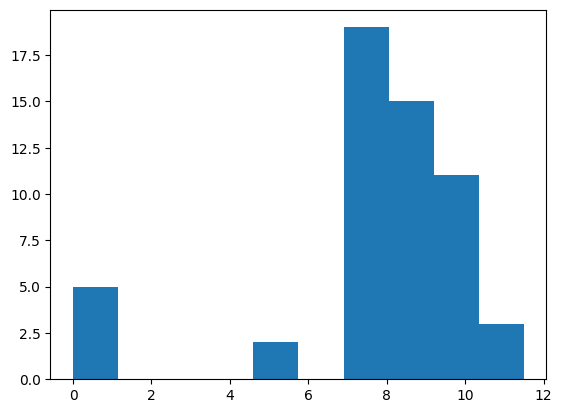

In [47]:
series_bar = dff[dff["Year"] == 2017]["Salary"]

plt.hist(series_bar, bins = 10)

In [52]:
dff['IsCoastalStr'] = np.where(dff["IsCoastal"] == 1, "Coastal", "NotCoastal") 

series_diagram = dff[['State', 'IsCoastal']].drop_duplicates().groupby('IsCoastal')['State'].count()
series_diagram

IsCoastal
0    36
1    19
Name: State, dtype: int64

Text(0.5, 1.0, 'Соотношение количества прибрежных и неприбрежных штатов.')

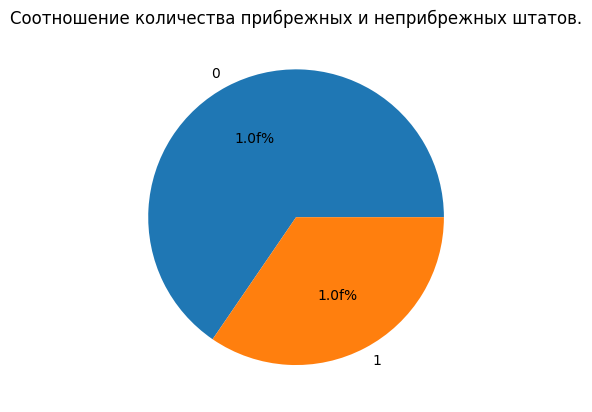

In [61]:
plt.pie(series_diagram, labels=series_diagram.index, autopct='%.2f')
plt.title("Соотношение количества прибрежных и неприбрежных штатов.")